In [2]:
import os
import numpy as np
import pandas as pd

file_path = './test_results.xlsx'

df_raw = pd.read_excel(file_path, engine='openpyxl')
df_raw = df_raw.loc[:, ~df_raw.columns.str.contains("Unnamed:")]

In [3]:
pivot_index = list(df_raw.columns[0:18]) # accuracy 전까지
pivot_index.remove('drift_model')
pivot_index.remove('n_rep')
pivot_index.remove('pruning')
pivot_index.remove('Gmax')
pivot_index.remove('Gmin')
pivot_index.remove('retrain')
pivot_index

['model',
 'dataset',
 'device',
 'IOparameter',
 'GDC',
 'mapping_scaling_omega',
 'noise_model',
 'pgm_noise_scale',
 'read_noise_scale',
 'drift_scale',
 'G_ratio',
 'inf_time']

In [6]:
df = df_raw.copy()

In [7]:
df = df[df['Gmax']=='default']
df = df[df['model']=='Resnet18']
df = df[df['GDC'] == 'on']
df = df[df['IOparameter'] == 'ideal']
df = df[df['pgm_noise_scale'] == 0]
df = df[df['retrain'] == 'X']

In [8]:
df['p_drift'] = df['pruning'].astype(str) + '_' + df['drift_model'].astype(str)

In [9]:
df_pivot = df.pivot_table(index=pivot_index, columns='p_drift', values='accuracy', aggfunc='mean')
df_pivot.reset_index(inplace=True) # index to columns

In [10]:
df_pivot

p_drift,model,dataset,device,IOparameter,GDC,mapping_scaling_omega,noise_model,pgm_noise_scale,read_noise_scale,drift_scale,...,-_linear,-_log,0.5_0.01,0.5_0.1,0.5_linear,0.5_log,0.6_0.01,0.6_0.1,0.6_linear,0.6_log
0,Resnet18,CIFAR10,PCMPresetUnitCell,ideal,on,1,TestNoiseModel,0,0,1,...,93.07,93.07,93.089989,93.089989,93.089989,93.089989,93.089989,93.07,93.07,93.07
1,Resnet18,CIFAR10,PCMPresetUnitCell,ideal,on,1,TestNoiseModel,0,0,1,...,93.120003,93.049995,93.07,93.080009,93.080009,93.120003,93.099991,93.049995,93.07,93.07
2,Resnet18,CIFAR10,PCMPresetUnitCell,ideal,on,1,TestNoiseModel,0,0,1,...,92.789993,92.580009,92.960007,92.93,92.919991,92.900009,93.049995,92.960007,92.830009,92.789993
3,Resnet18,CIFAR10,PCMPresetUnitCell,ideal,on,1,TestNoiseModel,0,0,1,...,92.370003,92.120003,92.719994,92.770004,92.43,92.270004,92.879997,92.910011,92.479996,92.280006
4,Resnet18,CIFAR10,PCMPresetUnitCell,ideal,on,1,TestNoiseModel,0,0,1,...,91.739998,91.390007,92.609993,92.700005,92.150009,91.900009,92.760002,92.68,92.140007,91.93
5,Resnet18,CIFAR10,PCMPresetUnitCell,ideal,on,1,TestNoiseModel,0,0,1,...,91.469994,90.93,92.469994,92.770004,92.07,91.57,92.640007,92.629997,91.859993,91.599991
6,Resnet18,CIFAR10,PCMPresetUnitCell,ideal,on,1,TestNoiseModel,0,0,1,...,90.010002,89.330009,92.339989,92.339989,91.190002,90.539993,92.460007,92.450005,90.879997,90.410011
7,Resnet18,CIFAR10,PCMPresetUnitCell,ideal,on,1,TestNoiseModel,0,0,1,...,84.589989,82.349991,91.469994,91.120003,88.109993,86.190002,91.82,91.299995,86.729996,85.75
8,Resnet18,CIFAR10,PCMPresetUnitCell,ideal,on,1,TestNoiseModel,0,0,1,...,80.559998,77.080009,91.020004,90.469994,85.770004,82.950005,91.400009,90.620003,83.979996,82.5
9,Resnet18,CIFAR10,PCMPresetUnitCell,ideal,on,1,TestNoiseModel,0,0,1,...,75.789993,70.879997,90.589989,89.739998,82.549995,78.589989,90.830009,89.469994,80.379997,78.339989


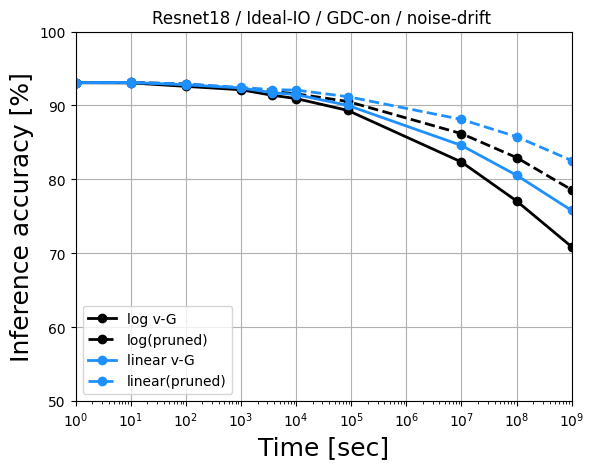

In [11]:
import matplotlib.pyplot as plt

x = df_pivot['inf_time']

plt.grid(True)

plt.plot(x,df_pivot['-_log'], marker='o', label = 'log v-G', linewidth=2, color='k')
plt.plot(x,df_pivot['0.5_log'], marker='o', label = 'log(pruned)', linestyle='--', linewidth=2, color='k')
# plt.plot(x,df_pivot['-_0.01'], marker='o', label = '0.01', linewidth=2, color='m')
# plt.plot(x,df_pivot['0.5_0.01'], marker='o', label = '0.01(0.5 pruned)', linestyle='--',linewidth=2, color='m')
# plt.plot(x,df_pivot['-_0.1'], marker='o', label = '0.1', linewidth=2, color='darkorange')
# plt.plot(x,df_pivot['0.5_0.1'], marker='o', label = '0.1(0.5 pruned)', linestyle='--',linewidth=2, color='darkorange')
plt.plot(x,df_pivot['-_linear'], marker='o', label = 'linear v-G', linewidth=2, color='dodgerblue')
plt.plot(x,df_pivot['0.5_linear'], marker='o', label = 'linear(pruned)', linestyle='--',linewidth=2, color='dodgerblue')


plt.title("Resnet18 / Ideal-IO / GDC-on / noise-drift ")
plt.legend(fontsize=10, loc='lower left', bbox_to_anchor=(0.0, 0.0))
plt.xlabel('Time [sec]',fontsize=18)  
plt.ylabel('Inference accuracy [%]', fontsize=18) #, fontweight='demi'
# plt.xticks(fontsize/14)

plt.ylim(50,100)
plt.xlim(1,1000000000)
plt.xscale('log')
plt.show()

In [16]:
df2 = df_raw.copy()
df2 = df2[df2['Gmax']=='default']
df2 = df2[df2['model']=='Resnet18']
df2 = df2[df2['GDC'] == 'on']
df2 = df2[df2['IOparameter'] == 'ideal']
df2 = df2[df2['pgm_noise_scale'] == 1]
df2 = df2[df2['retrain'] == 'X']


df2['p_drift'] = df2['pruning'].astype(str) + '_' + df2['drift_model'].astype(str)

df2_pivot = df2.pivot_table(index=pivot_index, columns='p_drift', values='accuracy', aggfunc='mean')
df2_pivot.reset_index(inplace=True) # index to columns

In [17]:
df2['p_drift'].unique()

array(['-_log', '-_linear', '-_0.01', '-_0.1', '0.3_log', '0.4_log',
       '0.5_log', '0.6_log', '0.7_log', '0.3_linear', '0.4_linear',
       '0.5_linear', '0.6_linear', '0.7_linear', '0.3_0.01', '0.4_0.01',
       '0.5_0.01', '0.6_0.01', '0.7_0.01', '0.3_0.1', '0.4_0.1',
       '0.5_0.1', '0.6_0.1', '0.7_0.1'], dtype=object)

In [18]:
df2_pivot

p_drift,model,dataset,device,IOparameter,GDC,mapping_scaling_omega,noise_model,pgm_noise_scale,read_noise_scale,drift_scale,...,0.5_linear,0.5_log,0.6_0.01,0.6_0.1,0.6_linear,0.6_log,0.7_0.01,0.7_0.1,0.7_linear,0.7_log
0,Resnet18,CIFAR10,PCMPresetUnitCell,ideal,on,1,TestNoiseModel,1,1,1,...,88.776993,88.776993,83.521004,83.521004,83.521004,83.521004,42.099998,42.099998,42.099998,42.099998
1,Resnet18,CIFAR10,PCMPresetUnitCell,ideal,on,1,TestNoiseModel,1,1,1,...,88.798996,88.842003,83.505997,83.530006,83.427994,83.597,46.459999,46.5,46.07,46.32
2,Resnet18,CIFAR10,PCMPresetUnitCell,ideal,on,1,TestNoiseModel,1,1,1,...,88.139999,88.316994,83.229004,83.312004,82.556992,83.179001,42.240002,42.759998,41.18,41.98
3,Resnet18,CIFAR10,PCMPresetUnitCell,ideal,on,1,TestNoiseModel,1,1,1,...,86.732002,87.031006,83.212997,83.374008,81.374001,82.393997,42.68,43.57,40.41,40.939999
4,Resnet18,CIFAR10,PCMPresetUnitCell,ideal,on,1,TestNoiseModel,1,1,1,...,85.483002,85.977005,82.797997,83.029999,80.039993,81.220993,44.639999,46.09,40.57,41.84
5,Resnet18,CIFAR10,PCMPresetUnitCell,ideal,on,1,TestNoiseModel,1,1,1,...,83.980003,84.695999,81.786003,82.168999,77.589996,79.060989,38.959999,40.73,35.119999,35.689999
6,Resnet18,CIFAR10,PCMPresetUnitCell,ideal,on,1,TestNoiseModel,1,1,1,...,81.638,82.897003,81.916,82.229004,75.422997,77.259003,46.07,46.639999,40.57,41.32
7,Resnet18,CIFAR10,PCMPresetUnitCell,ideal,on,1,TestNoiseModel,1,1,1,...,72.730003,76.086998,80.873001,81.388008,68.210999,70.723999,41.5,45.0,34.639999,34.029999
8,Resnet18,CIFAR10,PCMPresetUnitCell,ideal,on,1,TestNoiseModel,1,1,1,...,67.727997,72.045998,78.897995,79.617004,62.034996,64.218002,42.330002,44.790001,34.279999,33.48
9,Resnet18,CIFAR10,PCMPresetUnitCell,ideal,on,1,TestNoiseModel,1,1,1,...,61.095001,67.151001,78.607994,79.084,57.932007,60.733002,40.610001,42.290001,33.889999,32.630001


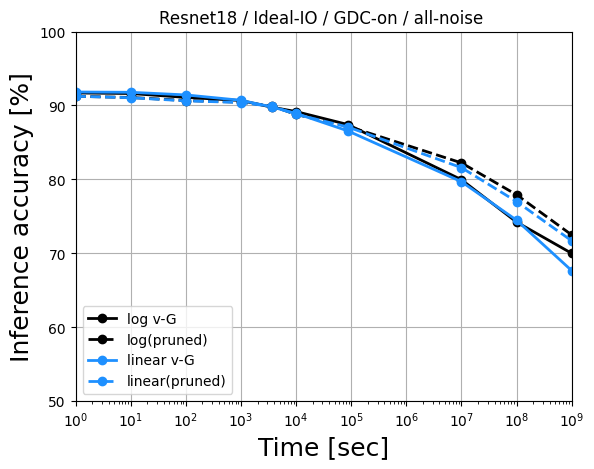

In [19]:
import matplotlib.pyplot as plt

x = df2_pivot['inf_time']

plt.grid(True)

plt.plot(x,df2_pivot['-_log'], marker='o', label = 'log v-G', linewidth=2, color='k')
# plt.plot(x,df_pivot['0.3_log'], marker='o', label = 'log(0.3 pruned)', linestyle='--', linewidth=2, color='k')
plt.plot(x,df2_pivot['0.4_log'], marker='o', label = 'log(pruned)', linestyle='--', linewidth=2, color='k')
# # plt.plot(x,df_pivot['0.5_log'], marker='o', label = 'log(0.5 pruned)', linestyle='--', linewidth=2)

# plt.plot(x,df_pivot['-_0.01'], marker='o', label = '0.01', linewidth=2, color='m')
# plt.plot(x,df_pivot['0.3_0.01'], marker='o', label = '0.01(0.3 pruned)', linestyle='--',linewidth=2, color='m')
# # plt.plot(x,df_pivot['0.4_0.01'], marker='o', label = '0.01(0.4 pruned)', linestyle='--',linewidth=2, color='m')
# # # plt.plot(x,df_pivot['0.5_0.01'], marker='o', label = '0.01(0.5 pruned)', linestyle='--',linewidth=2)

# plt.plot(x,df_pivot['-_0.1'], marker='o', label = '0.1', linewidth=2, color='darkorange')
# plt.plot(x,df_pivot['0.3_0.1'], marker='o', label = '0.1(0.3 pruned)', linestyle='--',linewidth=2)
# # plt.plot(x,df_pivot['0.4_0.1'], marker='o', label = '0.1(0.4 pruned)', linestyle='--',linewidth=2, color='darkorange')
# # plt.plot(x,df_pivot['0.5_0.1'], marker='o', label = '0.1(0.5 pruned)', linestyle='--',linewidth=2)

plt.plot(x,df2_pivot['-_linear'], marker='o', label = 'linear v-G', linewidth=2, color='dodgerblue')
# plt.plot(x,df_pivot['0.3_linear'], marker='o', label = 'linear(0.3 pruned)', linestyle='--',linewidth=2)
plt.plot(x,df2_pivot['0.4_linear'], marker='o', label = 'linear(pruned)', linestyle='--',linewidth=2, color='dodgerblue')
# plt.plot(x,df_pivot['0.5_linear'], marker='o', label = 'linear(0.5 pruned)', linestyle='--',linewidth=2)
# plt.plot(x,df_pivot['0.6_linear'], marker='o', label = 'linear(0.6 pruned)', linestyle='--',linewidth=2)


plt.title("Resnet18 / Ideal-IO / GDC-on / all-noise ")
plt.legend(fontsize=10, loc='lower left', bbox_to_anchor=(0.0, 0.0))
plt.xlabel('Time [sec]',fontsize=18)  
plt.ylabel('Inference accuracy [%]', fontsize=18) #, fontweight='demi'
# plt.xticks(fontsize/14)

plt.ylim(50,100)
plt.xlim(1,1000000000)
plt.xscale('log')
plt.show()